In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
import warnings
from sklearn.model_selection import train_test_split
from first_approach import preprocess_data
np.random.seed(42)
warnings.filterwarnings('ignore')


# Clustering Algorithms with Hyperparameter Research and 2D and 3D Visualization

In [2]:
data=pd.read_csv('data/data.csv')
train, test = train_test_split(
   data, test_size=0.3, random_state=42
) 


print("Dataset Info:")
print(data.info())
print("\nDataset Description:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9864 entries, 0 to 9863
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           9864 non-null   int64  
 1   Administrative_Duration  9864 non-null   float64
 2   Informational            9864 non-null   int64  
 3   Informational_Duration   9864 non-null   float64
 4   ProductRelated           9864 non-null   int64  
 5   ProductRelated_Duration  9864 non-null   float64
 6   BounceRates              9864 non-null   float64
 7   ExitRates                9864 non-null   float64
 8   PageValues               9864 non-null   float64
 9   SpecialDay               9864 non-null   float64
 10  Month                    9864 non-null   object 
 11  OperatingSystems         9864 non-null   int64  
 12  Browser                  9864 non-null   int64  
 13  Region                   9864 non-null   int64  
 14  TrafficTyp

## Data Preprocessing

In [3]:
from sklearn.decomposition import TruncatedSVD
import pandas as pd

train=preprocess_data(train)

def apply_svd2(data, n_components=2):
    svd = TruncatedSVD(n_components=n_components)
    data_svd = svd.fit_transform(data)
    return pd.DataFrame(data_svd, columns=[f'SVD{i+1}' for i in range(n_components)])

data_svd2 = apply_svd2(train)

In [4]:
def apply_svd3(data, n_components=3):
    svd = TruncatedSVD(n_components=n_components)
    data_svd = svd.fit_transform(data)
    return pd.DataFrame(data_svd, columns=[f'SVD{i+1}' for i in range(n_components)])

data_svd3 = apply_svd3(train)

## Hyperparameter Research


In [5]:

def evaluate_clustering(data, labels):
    score = silhouette_score(data, labels)
    return score


def kmeans_hyperparameter_research(data, param_grid):
    best_score = -1
    best_params = None
    for params in ParameterGrid(param_grid):
        kmeans = KMeans(**params, random_state=42)
        labels = kmeans.fit_predict(data)
        score = evaluate_clustering(data, labels)
        if score > best_score:
            best_score = score
            best_params = params
    return best_params, best_score


def hierarchical_hyperparameter_research(data, param_grid):
    best_score = -1
    best_params = None
    for params in ParameterGrid(param_grid):
        agg_clustering = AgglomerativeClustering(**params)
        labels = agg_clustering.fit_predict(data)
        score = evaluate_clustering(data, labels)
        if score > best_score:
            best_score = score
            best_params = params
    return best_params, best_score


def gmm_hyperparameter_research(data, param_grid):
    best_score = -1
    best_params = None
    for params in ParameterGrid(param_grid):
        gmm = GaussianMixture(**params, random_state=42)
        labels = gmm.fit_predict(data)
        score = evaluate_clustering(data, labels)
        if score > best_score:
            best_score = score
            best_params = params
    return best_params, best_score

def dbscan_hyperparameter_research(data, param_grid):
    best_score = -1
    best_params = None
    for params in ParameterGrid(param_grid):
        dbscan = DBSCAN(**params)
        labels = dbscan.fit_predict(data)
        # Silhouette score requires at least 2 clusters
        if len(set(labels)) > 1:
            score = evaluate_clustering(data, labels)
            if score > best_score:
                best_score = score
                best_params = params
    return best_params, best_score

In [6]:

kmeans_param_grid = {
    'n_clusters': [2, 3, 4, 5],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20],
    'max_iter': [300, 600]
}

hierarchical_param_grid = {
    'n_clusters': [2, 3, 4, 5],
    'linkage': ['ward', 'complete', 'average', 'single']
}

gmm_param_grid = {
    'n_components': [2, 3, 4, 5],
    'covariance_type': ['full', 'tied', 'diag', 'spherical']
}

dbscan_param_grid = {
    'eps': [0.3, 0.5, 0.7],
    'min_samples': [5, 10, 15]
}

In [7]:
print("\nK-Means Hyperparameter Research:")
best_kmeans_params2, best_kmeans_score2 = kmeans_hyperparameter_research(data_svd2, kmeans_param_grid)
print(f"Best K-Means Params: {best_kmeans_params2}, Best Score: {best_kmeans_score2:.2f}")


K-Means Hyperparameter Research:


  File "c:\anaconda\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


Best K-Means Params: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2, 'n_init': 10}, Best Score: 0.53


In [8]:
print("\nK-Means Hyperparameter Research:")
best_kmeans_params3, best_kmeans_score3 = kmeans_hyperparameter_research(data_svd3, kmeans_param_grid)
print(f"Best K-Means Params: {best_kmeans_params3}, Best Score: {best_kmeans_score3:.2f}")


K-Means Hyperparameter Research:
Best K-Means Params: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2, 'n_init': 10}, Best Score: 0.36


In [9]:
print("\nHierarchical Clustering Hyperparameter Research:")
best_hierarchical_params2, best_hierarchical_score2 = hierarchical_hyperparameter_research(data_svd2, hierarchical_param_grid)
print(f"Best Hierarchical Params: {best_hierarchical_params2}, Best Score: {best_hierarchical_score2:.2f}")


Hierarchical Clustering Hyperparameter Research:
Best Hierarchical Params: {'linkage': 'average', 'n_clusters': 2}, Best Score: 0.57


In [10]:
print("\nHierarchical Clustering Hyperparameter Research:")
best_hierarchical_params3, best_hierarchical_score3 = hierarchical_hyperparameter_research(data_svd3, hierarchical_param_grid)
print(f"Best Hierarchical Params: {best_hierarchical_params3}, Best Score: {best_hierarchical_score3:.2f}")


Hierarchical Clustering Hyperparameter Research:
Best Hierarchical Params: {'linkage': 'single', 'n_clusters': 2}, Best Score: 0.55


In [11]:
print("\nGMM Hyperparameter Research:")
best_gmm_params2, best_gmm_score2 = gmm_hyperparameter_research(data_svd2, gmm_param_grid)
print(f"Best GMM Params: {best_gmm_params2}, Best Score: {best_gmm_score2:.2f}")


GMM Hyperparameter Research:
Best GMM Params: {'covariance_type': 'tied', 'n_components': 2}, Best Score: 0.55


In [12]:
print("\nGMM Hyperparameter Research:")
best_gmm_params3, best_gmm_score3 = gmm_hyperparameter_research(data_svd3, gmm_param_grid)
print(f"Best GMM Params: {best_gmm_params3}, Best Score: {best_gmm_score3:.2f}")


GMM Hyperparameter Research:
Best GMM Params: {'covariance_type': 'tied', 'n_components': 2}, Best Score: 0.41


In [13]:
print("\nDBSCAN Hyperparameter Research:")
best_dbscan_params2, best_dbscan_score2 = dbscan_hyperparameter_research(data_svd2, dbscan_param_grid)
print(f"Best DBSCAN Params: {best_dbscan_params2}, Best Score: {best_dbscan_score2:.2f}")


DBSCAN Hyperparameter Research:
Best DBSCAN Params: {'eps': 0.3, 'min_samples': 15}, Best Score: 0.63


In [14]:
print("\nDBSCAN Hyperparameter Research:")
best_dbscan_params3, best_dbscan_score3 = dbscan_hyperparameter_research(data_svd3, dbscan_param_grid)
print(f"Best DBSCAN Params: {best_dbscan_params3}, Best Score: {best_dbscan_score3:.2f}")


DBSCAN Hyperparameter Research:
Best DBSCAN Params: {'eps': 0.5, 'min_samples': 15}, Best Score: 0.53


## Clustering with Best Hyperparameters

In [15]:

def kmeans_clustering(data, params):
    kmeans = KMeans(**params, random_state=42)
    labels = kmeans.fit_predict(data)
    return labels

def hierarchical_clustering(data, params):
    agg_clustering = AgglomerativeClustering(**params)
    labels = agg_clustering.fit_predict(data)
    return labels

def gmm_clustering(data, params):
    gmm = GaussianMixture(**params, random_state=42)
    labels = gmm.fit_predict(data)
    return labels

def dbscan_clustering(data, params):
    dbscan = DBSCAN(**params)
    labels = dbscan.fit_predict(data)
    return labels

kmeans_labels2 = kmeans_clustering(data_svd2, best_kmeans_params2)
hierarchical_labels2 = hierarchical_clustering(data_svd2, best_hierarchical_params2)
gmm_labels2 = gmm_clustering(data_svd2, best_gmm_params2)
dbscan_labels2 = dbscan_clustering(data_svd2, best_dbscan_params2)

kmeans_labels3 = kmeans_clustering(data_svd3, best_kmeans_params3)
hierarchical_labels3 = hierarchical_clustering(data_svd3, best_hierarchical_params3)
gmm_labels3 = gmm_clustering(data_svd3, best_gmm_params3)
dbscan_labels3 = dbscan_clustering(data_svd3, best_dbscan_params3)

## 2D Visualization


Plotting Clusters:


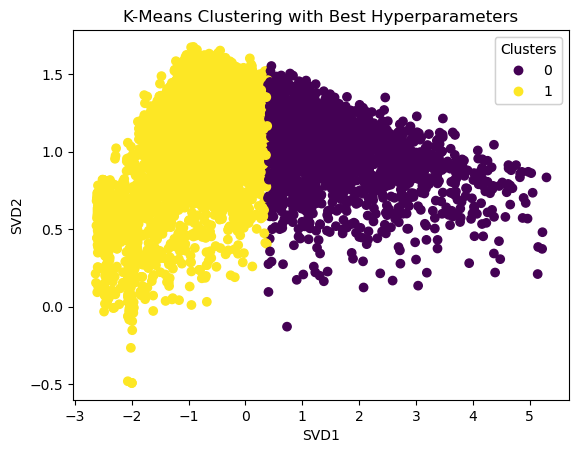

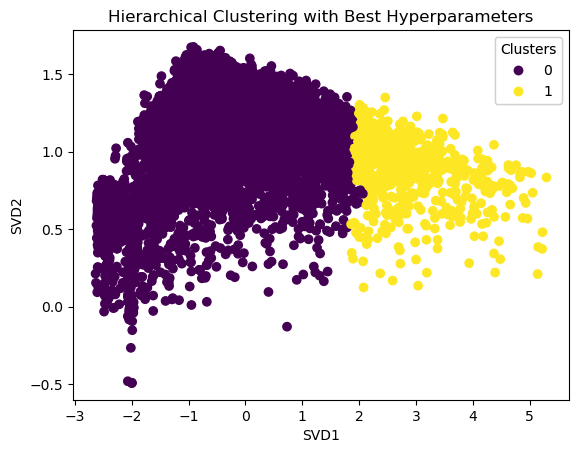

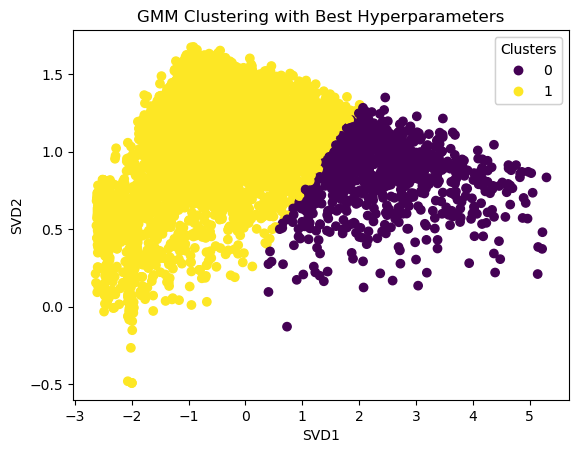

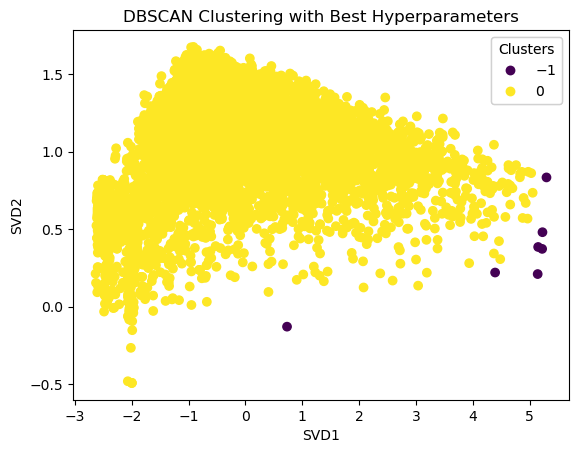

In [18]:

def plot_clusters_2d(data, labels, title):
    fig = plt.figure()
    ax = fig.add_subplot()
    scatter = ax.scatter(data['SVD1'], data['SVD2'], c=labels, cmap='viridis')
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    ax.set_xlabel('SVD1')
    ax.set_ylabel('SVD2')
    ax.set_title(title)
    plt.show()

print("\nPlotting Clusters:")
plot_clusters_2d(data_svd2, kmeans_labels2, "K-Means Clustering with Best Hyperparameters")
plot_clusters_2d(data_svd2, hierarchical_labels2, "Hierarchical Clustering with Best Hyperparameters")
plot_clusters_2d(data_svd2, gmm_labels2, "GMM Clustering with Best Hyperparameters")
plot_clusters_2d(data_svd2, dbscan_labels2, "DBSCAN Clustering with Best Hyperparameters")

## 3D Visualization


Plotting Clusters:


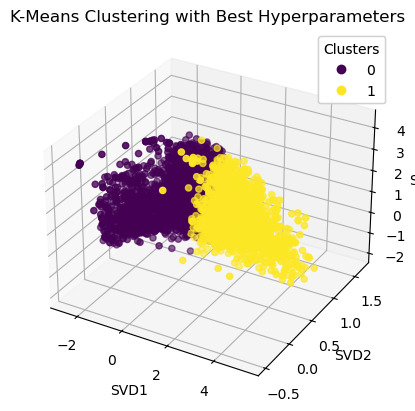

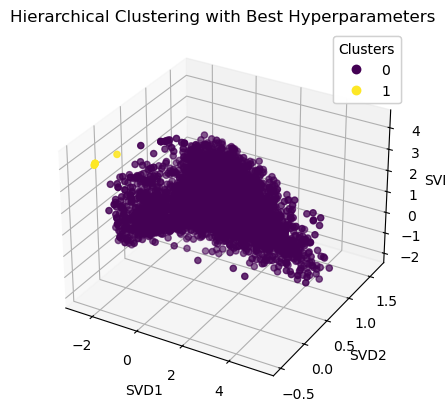

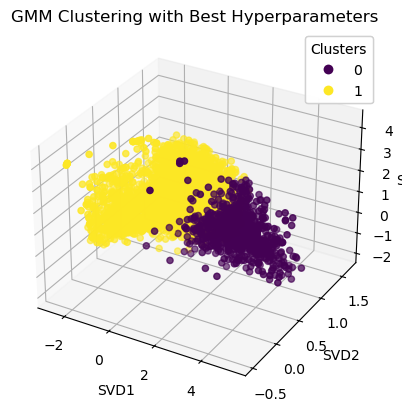

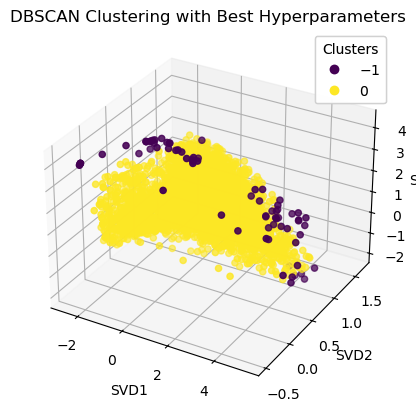

In [19]:
def plot_clusters_3d(data, labels, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data['SVD1'], data['SVD2'], data['SVD3'], c=labels, cmap='viridis')
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    ax.set_xlabel('SVD1')
    ax.set_ylabel('SVD2')
    ax.set_zlabel('SVD3')
    ax.set_title(title)
    plt.show()

print("\nPlotting Clusters:")
plot_clusters_3d(data_svd3, kmeans_labels3, "K-Means Clustering with Best Hyperparameters")
plot_clusters_3d(data_svd3, hierarchical_labels3, "Hierarchical Clustering with Best Hyperparameters")
plot_clusters_3d(data_svd3, gmm_labels3, "GMM Clustering with Best Hyperparameters")
plot_clusters_3d(data_svd3, dbscan_labels3, "DBSCAN Clustering with Best Hyperparameters")

## Metrics

In [26]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

sil_score1 = silhouette_score(data_svd2, kmeans_labels2)
db_score1 = davies_bouldin_score(data_svd2, kmeans_labels2)

sil_score2 = silhouette_score(data_svd2, hierarchical_labels2)
db_score2 = davies_bouldin_score(data_svd2, hierarchical_labels2)

sil_score3 = silhouette_score(data_svd2, gmm_labels2)
db_score3 = davies_bouldin_score(data_svd2, gmm_labels2)

sil_score4 = silhouette_score(data_svd2, dbscan_labels2)
db_score4 = davies_bouldin_score(data_svd2, dbscan_labels2)

print(f'KMeans Silhouette Score: {sil_score1}', f' KMeans Davies-Bouldin Index: {db_score1}')
print(f'Hierarchical Silhouette Score: {sil_score2}', f' Hierarchical Davies-Bouldin Index: {db_score2}')
print(f'GMM Silhouette Score: {sil_score3}', f' GMM Davies-Bouldin Index: {db_score3}')
print(f'Dbscan Silhouette Score: {sil_score4}', f' Dbscan Davies-Bouldin Index: {db_score4}')

KMeans Silhouette Score: 0.5254540094368191  KMeans Davies-Bouldin Index: 0.6812217009114088
Hierarchical Silhouette Score: 0.5723441242945928  Hierarchical Davies-Bouldin Index: 0.4844489419442031
GMM Silhouette Score: 0.5488578795613841  GMM Davies-Bouldin Index: 0.5664319652932466
Dbscan Silhouette Score: 0.6257888450653727  Dbscan Davies-Bouldin Index: 0.4850093689202691


In [28]:
sil_score1 = silhouette_score(data_svd3, kmeans_labels3)
db_score1 = davies_bouldin_score(data_svd3, kmeans_labels3)

sil_score2 = silhouette_score(data_svd3, hierarchical_labels3)
db_score2 = davies_bouldin_score(data_svd3, hierarchical_labels3)

sil_score3 = silhouette_score(data_svd3, gmm_labels3)
db_score3 = davies_bouldin_score(data_svd3, gmm_labels3)

sil_score4 = silhouette_score(data_svd3, dbscan_labels3)
db_score4 = davies_bouldin_score(data_svd3, dbscan_labels3)

print(f'KMeans Silhouette Score: {sil_score1}', f' KMeans Davies-Bouldin Index: {db_score1}')
print(f'Hierarchical Silhouette Score: {sil_score2}', f' Hierarchical Davies-Bouldin Index: {db_score2}')
print(f'GMM Silhouette Score: {sil_score3}', f' GMM Davies-Bouldin Index: {db_score3}')
print(f'Dbscan Silhouette Score: {sil_score4}', f' Dbscan Davies-Bouldin Index: {db_score4}')
#Hierarchical Silhouette Score: 0.5530501055211319  Hierarchical Davies-Bouldin Index: 0.3442474604155362


KMeans Silhouette Score: 0.3635287094268728  KMeans Davies-Bouldin Index: 1.061937333122746
Hierarchical Silhouette Score: 0.5530501055211319  Hierarchical Davies-Bouldin Index: 0.3442474604155362
GMM Silhouette Score: 0.4143681673102847  GMM Davies-Bouldin Index: 0.8455679305312637
Dbscan Silhouette Score: 0.5288027823454649  Dbscan Davies-Bouldin Index: 1.3092630325514816


In [41]:
labels, counts = np.unique(kmeans_labels2, return_counts=True)
for label, count in zip(labels, counts):
    print(f'KMeans2 Cluster {label}: {count} instances')

labels, counts = np.unique(hierarchical_labels2, return_counts=True)
for label, count in zip(labels, counts):
    print(f'Hierarchical2 Cluster {label}: {count} instances')

labels, counts = np.unique(gmm_labels2, return_counts=True)
for label, count in zip(labels, counts):
    print(f'GMM2 Cluster {label}: {count} instances')

labels, counts = np.unique(dbscan_labels2, return_counts=True)
for label, count in zip(labels, counts):
    print(f'Dbscan2 Cluster {label}: {count} instances')

labels, counts = np.unique(hierarchical_labels3, return_counts=True)
for label, count in zip(labels, counts):
    print(f'Hierarchical3 Cluster {label}: {count} instances')

labels, counts = np.unique(gmm_labels3, return_counts=True)
for label, count in zip(labels, counts):
    print(f'GMM3 Cluster {label}: {count} instances')

# KMeans2 Hierarchical2 GMM2 GMM3 the most balanced

KMeans2 Cluster 0: 2148 instances
KMeans2 Cluster 1: 4756 instances
Hierarchical2 Cluster 0: 6294 instances
Hierarchical2 Cluster 1: 610 instances
GMM2 Cluster 0: 890 instances
GMM2 Cluster 1: 6014 instances
Dbscan2 Cluster -1: 7 instances
Dbscan2 Cluster 0: 6897 instances
Hierarchical3 Cluster 0: 6899 instances
Hierarchical3 Cluster 1: 5 instances
GMM3 Cluster 0: 875 instances
GMM3 Cluster 1: 6029 instances
